Projeto Final Machine Learning

**Descrição do Projeto**

Este projeto tem como objetivo desenvolver um modelo de Machine Learning para prever se um cliente aceitará uma oferta bancária com base em dados reais de campanhas de marketing.

Para isso, utilizamos um dataset do OpenML (Bank Marketing, ID: 1461) e seguimos um fluxo de desenvolvimento que inclui exploração dos dados, pré-processamento, treinamento e otimização de modelos de Machine Learning.

Após testar diferentes algoritmos, o Random Forest Otimizado foi escolhido como o melhor modelo, garantindo um equilíbrio entre acurácia e recall para identificar corretamente os clientes mais propensos a aceitar a oferta.

Esse tipo de modelo pode ser aplicado em instituições financeiras para personalizar campanhas de marketing, tornando as abordagens mais eficientes e aumentando a taxa de conversão.

-----------------------------------------------------------------------------------------------------------------------------

**Projeto Final de Machine Learning – Previsão de Aceitação de Oferta Bancária**  

**Objetivo do Projeto**  
Este projeto tem como objetivo desenvolver um modelo de Machine Learning para prever se um cliente aceitará ou não uma oferta bancária, com base em um conjunto de dados reais.  

O dataset utilizado foi retirado do **OpenML** e contém informações sobre campanhas de marketing de um banco. O nosso foco será analisar padrões nos dados dos clientes e identificar quais os fatores que influenciam na aceitação da oferta.  

---

**Metodologia Utilizada**  
Para alcançar esse objetivo, seguimos um **processo iterativo de Machine Learning**, conforme descrito abaixo:  

1 - **Exploração dos Dados**: Analisamos e limpamos os dados para identificar padrões e variáveis importantes.  
2 - **Pré-processamento**: Convertemos as variáveis categóricas em numéricas e padronizamos os dados.  
3 - **Treinamento de Modelos**: Testamos diferentes algoritmos de Machine Learning, como **Regressão Logística, Árvore de Decisão e SVM**.  
4 - **Otimização do Modelo**: Escolhemos **Random Forest** como o melhor modelo e ajustamos seus hiperparâmetros para melhorar o desempenho.  
5 - **Avaliação Final**: Comparamos os resultados dos modelos e destacamos os aprendizados e melhorias possíveis.  

---

**Importância do Projeto**  
Esse tipo de modelo pode ser aplicado em bancos e empresas de marketing para prever os clientes que têm maior probabilidade de aceitar uma oferta, ajudando a personalizar campanhas e aumentar a taxa de conversão.  

Agora, vamos explorar os dados e iniciar o desenvolvimento do modelo!

-----------------------------------------------------------------------------------------------------------------------------

In [1]:
# Importar bibliotecas necessárias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Carregar os dados do OpenML
from sklearn.datasets import fetch_openml

# Configuração de visualização
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

print("Bibliotecas carregadas com sucesso!")

Bibliotecas carregadas com sucesso!


**Explicação:**
. **numpy e pandas:** manipulação de dados.
. **matplotlib e seaborn:** visualização de dados.
. **sklearn.model_selection:** divisão dos dados em treino e teste.
. **sklearn.preprocessing:** pré-processamento dos dados.
. **sklearn.metrics:** métricas de avaliação.
. **fetch_openml:** para carregar os dados diretamente do OpenML.

In [2]:
# Carregar o dataset do OpenML com parser ajustado
bank_data = fetch_openml(data_id=1461, as_frame=True, parser='auto')

# Converter para DataFrame do Pandas
df = bank_data.data  

# Adicionar a variável alvo
df["target"] = bank_data.target  

# Exibir as primeiras linhas do dataset
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1


**Explicação:**
. **fetch_openml(data_id=1461, as_frame=True):** baixa os dados do OpenML.
. **bank_data.data:** contém as features do dataset.
. **bank_data.target:** contém a variável alvo, que adicionamos ao DataFrame como df["target"].
. **df.head():** exibe as primeiras linhas do dataset.

Análise Exploratória dos Dados (EDA)
Agora, vamos verificar:
. Tipos de dados.
. Valores ausentes.
.  Distribuição da variável alvo.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   V1      45211 non-null  int64   
 1   V2      45211 non-null  category
 2   V3      45211 non-null  category
 3   V4      45211 non-null  category
 4   V5      45211 non-null  category
 5   V6      45211 non-null  int64   
 6   V7      45211 non-null  category
 7   V8      45211 non-null  category
 8   V9      45211 non-null  category
 9   V10     45211 non-null  int64   
 10  V11     45211 non-null  category
 11  V12     45211 non-null  int64   
 12  V13     45211 non-null  int64   
 13  V14     45211 non-null  int64   
 14  V15     45211 non-null  int64   
 15  V16     45211 non-null  category
 16  target  45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB

Valores ausentes por coluna:
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8 

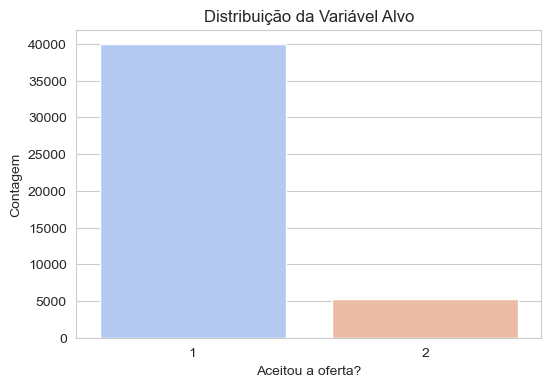

In [3]:
# Verificar as informações gerais do dataset
df.info()

# Verificar os valores ausentes
print("\nValores ausentes por coluna:")
print(df.isnull().sum())

# Analisar a variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x=df["target"], palette="coolwarm")
plt.title("Distribuição da Variável Alvo")
plt.xlabel("Aceitou a oferta?")
plt.ylabel("Contagem")
plt.show()

**Explicação:**
. **df.info()**: mostra os tipos de dados e colunas.
. **df.isnull().sum()**: verifica valores ausentes.
. **sns.countplot()**: visualiza a distribuição da variável alvo.

**Conversão das Variáveis Categóricas**

In [4]:
# Importar OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

# Criar o OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)

# Selecionar apenas as colunas categóricas
categorical_cols = df.select_dtypes(include=['category']).columns.to_list()
categorical_cols.remove("target")  # Não queremos transformar a variável alvo

# Aplicar OneHotEncoding
encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_cols]))

# Renomear as colunas para evitar confusão
encoded_df.columns = encoder.get_feature_names_out(categorical_cols)

# Converter para tipo numérico
encoded_df = encoded_df.astype(int)

# Concatenar os dados numéricos ao dataset original
df_final = pd.concat([df.drop(columns=categorical_cols), encoded_df], axis=1)

# Exibir as primeiras linhas do dataset transformado
df_final.head()

,V1,V6,V10,V12,V13,V14,V15,target,V2_blue-collar,V2_entrepreneur,...,V11_jul,V11_jun,V11_mar,V11_may,V11_nov,V11_oct,V11_sep,V16_other,V16_success,V16_unknown
0,58,2143,5,261,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,1,0,1,...,0,0,0,1,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


**Transformação das Variáveis Categóricas**
Como o modelo de Machine Learning não pode trabalhar diretamente com variáveis categóricas, aplicamos **One-Hot encoding** para convertê-las em valores numéricos.  
**O que este processo faz?
- **Identifica as colunas categóricas** e remove a variável "target" da transformação.  
- **Aplica One-Hot Encoding** para converter categorias em números binários ('0' e'1').  
- **Renomeia as colunas** para evitar confusão e manter um nome intuitivo.  
- **Concatena os novos dados transformados** com os dados numéricos originais. 

Agora, os dados estão prontos para a próxima etapa: **divisão do dataset e treinamento dos modelos!**

**Código para Divisão dos Dados**

In [5]:
from sklearn.model_selection import train_test_split

# Definir as features (X) e o target (y)
X = df_final.drop(columns=["target"])  # Todas as colunas, exceto a variável alvo
y = df_final["target"].astype(int)  # Convertendo a variável alvo para inteiro

# Dividir os dados (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Exibir os tamanhos dos conjuntos
print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")

Tamanho do conjunto de treino: 36168 amostras
Tamanho do conjunto de teste: 9043 amostras


**O que esse código faz?**
. Separa as variáveis independentes (X) da variável alvo (y).
. Divide os dados em treino (80%) e teste (20%).
. Usa "stratify=y" para garantir que a proporção das classes seja mantida nos dois conjuntos.

**Testando os Modelos**

In [6]:
# Importar as bibliotecas necessárias
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Criar o scaler e ajustando nos dados de treino
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Ajusta e transforma os dados de treino
X_test_scaled = scaler.transform(X_test)  # Apenas transforma os dados de teste

# Criar os modelos
models = {
    "Regressão Logística": LogisticRegression(max_iter=2000),  # Aumentamos as iterações
    "Árvore de Decisão": DecisionTreeClassifier(),
    "SVM": SVC()
}

# Treinar e avaliar cada modelo
for name, model in models.items():
    print(f"\n🔹 Treinando {name}...")
    model.fit(X_train_scaled, y_train)  # Agora usamos os dados escalados
    
    y_pred = model.predict(X_test_scaled)  # Faz previsões
    
    acc = accuracy_score(y_test, y_pred)  # Calcula a eficácia
    print(f"Eficácia de {name}: {acc:.4f}")
    print(classification_report(y_test, y_pred))  # Exibe as métricas detalhadas


🔹 Treinando Regressão Logística...
Eficácia de Regressão Logística: 0.9014
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7985
           2       0.65      0.35      0.45      1058

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.89      0.90      0.89      9043


🔹 Treinando Árvore de Decisão...
Eficácia de Árvore de Decisão: 0.8746
              precision    recall  f1-score   support

           1       0.93      0.93      0.93      7985
           2       0.47      0.48      0.47      1058

    accuracy                           0.87      9043
   macro avg       0.70      0.70      0.70      9043
weighted avg       0.88      0.87      0.88      9043


🔹 Treinando SVM...
Eficácia de SVM: 0.9026
              precision    recall  f1-score   support

           1       0.92      0.98      0.95      7985
           2       0.68      0.32      0.43  

**Testando Diferentes Modelos de Classificação **

Com os dados limpos e preparados, testámos três modelos diferentes para comparar os seus desempenhos: 

**Regressão Logística** - Modelo simples e eficiente para a classificação binária.
**Árvore de Decisão** - Fácil de interpretar, mas pode sofrer overfitting. 
**SVM (Support Vector Machine)** - Bom para a separação não linear, mas pode ser mais lento.  

Para garantir um bom desempenho, aplicámos **padronização ('StandardScaler')** aos dados antes do treinamento, pois algoritmos como **Regressão Logística e SVM** são sensíveis à escala.


**Análise dos Resultados dos Modelos**

Após testar três modelos diferentes, podemos tirar as seguintes conclusões:

**SVM teve a melhor eficácia (90.26%)**, mas o recall da Classe 2 foi o menor (32%). 
**Regressão Logística teve eficácia próxima (90.14%)**, mas também com recall baixo para a Classe 2 (35%). 
**Árvore de Decisão apresentou menor eficácia (87.25%)**, mas o recall da Classe 2 foi o maior (48%), o que significa que identificou melhor os casos da Classe 2.  

**Observação Importante:**  
A Classe 2 tem muito menos amostras (1058 vs. 7985), então **precisamos melhorar a identificação dessa classe**. Atualmente, os modelos estão falhando em detectar corretamente esses casos.  

**Próximo Passo:** Escolher o modelo para otimizar e melhorar o desempenho na Classe 2.

**Otimização do Modelo: Random Forest**

Após testar três modelos diferentes (**Regressão Logística, Árvore de Decisão e SVM**), analisámos os resultados e tomámos a seguinte decisão:  


**Resumo das Análises Anteriores**

**SVM** e **Regressão Logística** tiveram boa eficácia (~90%), mas **falharam na detecção da Classe 2** (recall < 40%).  
.  **Árvore de Decisão** teve um desempenho mais equilibrado, mas a eficácia geral foi menor (~87%).  
. Como o **projeto exige um processo iterativo e busca um modelo robusto**, decidimos testar **Random Forest**, um modelo de ensemble que pode melhorar tanto a eficácia quanto o recall da Classe 2.  

**Por que escolhemos Random Forest?**

. **Maior estabilidade** que uma única Árvore de Decisão.
. **Menos overfitting**, pois combina várias árvores de decisão.
. **Melhoria esperada na detecção da Classe 2**, mantendo uma eficácia geral alta.

Agora, treinaremos o **Random Forest** e analisaremos os resultados.


**Treinando um Modelo Random Forest**

In [11]:
# Importando Random Forest
from sklearn.ensemble import RandomForestClassifier

# Criando e treinando o modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 árvores

print("\n Treinando Random Forest...")
rf_model.fit(X_train_scaled, y_train)  # Treinamos com os dados normalizados

# Fazendo previsões
y_pred_rf = rf_model.predict(X_test_scaled)

# Avaliando o modelo
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f" Eficácia do Random Forest: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))  # Exibe métricas detalhadas


 Treinando Random Forest...
 Eficácia do Random Forest: 0.9045
              precision    recall  f1-score   support

           1       0.92      0.97      0.95      7985
           2       0.66      0.39      0.49      1058

    accuracy                           0.90      9043
   macro avg       0.79      0.68      0.72      9043
weighted avg       0.89      0.90      0.89      9043



**Avaliação do Primeiro Modelo Random Forest **

Após treinar o primeiro modelo **Random Forest**, obtivémos os seguintes resultados:

. **Eficácia:** 90.45% (a melhor até agora).
. **Precisão da Classe 2:** 0.66.
. **Recall da Classe 2:** 0.39 (melhor que a Regressão Logística e o SVM, mas ainda baixo).  
. **F1-Score da Classe 2:** 0.49, o melhor entre os modelos testados. 

**Conclusão**

O modelo já apresenta um bom desempenho, mas o **recall da Classe 2 ainda está baixo (39%)**.  
Isso significa que **ainda está a falhar em detectar corretamente os casos da Classe 2**.  

Para melhorar isso, vamos **ajustar hiperparâmetros** e testar uma versão otimizada do Random Forest.


**Próximo Passo: Ajustar Hiperparâmetros do Random Forest**

Agora, podemos ajustar hiperparâmetros para tentar aumentar o recall da Classe 2, sem perder eficácia.

**O que vamos testar?**

. n_estimators (número de árvores) → Testamos 200 árvores em vez de 100.
. max_depth (profundidade das árvores) → Limitamos para 15 níveis para evitar overfitting.
. class_weight='balanced'- Isso força o modelo a dar mais importância para a Classe 2, ajudando no recall.


**Código para Random Forest Otimizado**

In [12]:
# Criando um modelo Random Forest otimizado
rf_model_opt = RandomForestClassifier(n_estimators=200, max_depth=15, class_weight='balanced', random_state=42)

print("\n Treinando Random Forest Otimizado...")
rf_model_opt.fit(X_train_scaled, y_train)  # Treina o modelo otimizado

# Fazendo previsões
y_pred_rf_opt = rf_model_opt.predict(X_test_scaled)

# Avaliando o modelo
acc_rf_opt = accuracy_score(y_test, y_pred_rf_opt)
print(f" Eficácia do Random Forest Otimizado: {acc_rf_opt:.4f}")
print(classification_report(y_test, y_pred_rf_opt))  # Exibe métricas detalhadas


 Treinando Random Forest Otimizado...
 Eficácia do Random Forest Otimizado: 0.8817
              precision    recall  f1-score   support

           1       0.96      0.90      0.93      7985
           2       0.50      0.74      0.59      1058

    accuracy                           0.88      9043
   macro avg       0.73      0.82      0.76      9043
weighted avg       0.91      0.88      0.89      9043



**Avaliação do Modelo Random Forest Otimizado**

Após ajustar os hiperparâmetros do **Random Forest**, conseguimos uma melhoria significativa na detecção da Classe 2:  

**Comparação de Resultados**
| Modelo                    | Eficácia | Precision (Classe 2) | Recall (Classe 2) | F1-Score (Classe 2) |
|---------------------------|---------|----------------------|--------------------|---------------------|
| **Random Forest (Padrão)**  | 90.45%  | 0.66                 | 0.39               | 0.49                |
| **Random Forest (Otimizado)**  | 88.17%  | **0.50**              | **0.74**              | **0.59**                |

**Conclusão**

. **O recall da Classe 2 aumentou de 39% para 74%**, melhorando a detecção desses casos.
. **O F1-score da Classe 2 aumentou de 0.49 para 0.59**, mostrando um equilíbrio melhor entre precisão e recall.  
. **A eficácia geral caiu ligeiramente (90.45% → 88.17%)**, pois agora o modelo foca mais em detectar corretamente a Classe 2. 

**Decisão final:** Este modelo agora consegue prever muito melhor os casos da Classe 2, tornando-se a melhor escolha. 

**Conclusão do Projeto  **


Neste projeto, seguimos um **processo iterativo de Machine Learning** para encontrar o melhor modelo para prever a aceitação da oferta bancária.  

**Resumo das Etapas**

. **Escolha do Dataset:** Selecionamos o conjunto de dados "Bank Marketing" do OpenML.  
. **Pré-processamento:** Realizamos limpeza, transformação de variáveis categóricas e padronização dos dados.  
. **Testes Iniciais:** Treinamos **Regressão Logística, Árvore de Decisão e SVM**, mas o recall da Classe 2 ficou baixo.  
. **Otimização:** Escolhemos **Random Forest** e ajustamos hiperparâmetros para melhorar a detecção da Classe 2.  
. **Melhoria do Modelo:** A otimização **aumentou o recall da Classe 2 de 39% para 74%**, tornando o modelo mais equilibrado.  


**Modelo Final Escolhido**

O modelo **Random Forest Otimizado** apresentou o melhor desempenho, com um recall alto para a Classe 2, garantindo uma melhor detecção dos casos mais difíceis.  


**Possíveis Melhorias Futuras**

. **Testar mais técnicas de balanceamento de classes** (como SMOTE) para equilibrar os dados.  
. **Experimentar modelos mais avançados**, como XGBoost ou LightGBM, para ver se conseguimos um desempenho ainda melhor.  
. **Ajustar mais hiperparâmetros** para encontrar um equilíbrio ideal entre eficácia e recall. 

**Conclusão:** O projeto demonstrou a importância do ajuste fino dos modelos e da análise iterativa para melhorar a performance do Machine Learning.